## Reto 4: Nltk FreqDist y Visualizaciones de NLP

### 1. Objetivos:
    - Aprender a realizar análisis estadístico de datos no estructurados utilizando FreqDist
    - Utilizar seaborn para visualizar los análisis estadísticos que visualicemos
 
---
    
### 2. Desarrollo:

Vamos a utilizar el objeto `FreqDist` para hacer análisis estadístico de las mismas evaluaciones que has utilizado en los últimos Retos. Intercalaremos análisis puramente numérico con visualizaciones realizadas con `seaborn` y `matplotlib` para hacer más claros nuestros hallazgos.

Tu Reto consiste en lo siguiente:

1. Tokeniza las evaluaciones y crea una sola lista que contenga todas las palabras en nuestro conjunto de datos.
2. Utiliza el objeto `stopwords` encontrado en la librería `nltk.corpus` para filtrar todas las palabras vacías de tu conjunto de datos y solamente tener palabras relevantes.
3. Crea un objeto `Text` con tu dataset resultante.
4. Crea también un objeto `FreqDist` con el mismo dataset.
5. Obtén las 20 palabras más comunes en el dataset y realiza una gráfica de barras 'verticales' para visualizar su frecuencia.
6. Obtén las 50 palabras más comunes en el dataset y realiza una gráfica de barras 'horizontales' para visualizar su frecuencia.
7. Obtén los 20 bigramas más frecuentes en el dataset y realiza una gráfica de barras 'verticales' para visualizar tu frecuencia.
8. Obtén una lista de las palabras que tengan 10 o más caracteres que aparezcan por lo menos 7 veces en el dataset.
9. Realiza un histograma del número de palabras contenidas en cada evaluación.
10. Genera una nube de palabras con tu dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud 

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto amazon_fine_food_reviews-clean.csv')
df.head()

,id,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,summary,text
0,258510,B00168V34W,A1672LH9S1XO70,"Lorna J. Loomis ""Canadian Dog Fancier""",13,14,3,1266796800,"Misleading to refer to ""PODS""","This coffee does NOT come in individual ""PODS""..."
1,207915,B000CQID2Y,A42CJC66XO0H7,"Scott Schimmel ""A Butterfly Dreaming""",2,2,5,1279497600,Delicious,I was a little skeptical after looking at the ...
2,522649,B007TJGZ0Y,A16QZBG2UN6Z3X,"Toology ""Toology""",0,0,5,1335830400,One of my favs,Gloia Jeans Butter Toffee is one of my favorit...
3,393368,B000W7PUOW,A3J21CQZG60K35,Hsieh Pei Hsuan,2,2,5,1265673600,Tasty!!,My families and friends love Planters peanuts ...
4,178178,B002FX2IOQ,A1Z7XV6JU0EV8M,"Barbara ""Barbara""",1,6,1,1301788800,"Organic Valley White 1 % Milkfat Lowfat Milk, ...","Organic Valley White 1 % Milkfat Lowfat Milk, ..."


In [5]:
grouped_by_product = df.groupby('product_id')['text'].max()

grouped_by_product

product_id
0006641040    TITLE: Chicken Soup with Rice<br />AUTHOR: Mau...
7310172001    I buy a big tub of these for my dog about ever...
7310172101    This is a great treat for dogs, but do read th...
B00004CI84    well one of the best you just have to have a c...
B00004CXX9    What happens when you say his name three times...
                                    ...                        
B009M2LUEW    When I found out about this product from Jorge...
B009NTCO4O    I purchased this item for a christmas<br />gif...
B009NY1MC4    This is fantastic! It is more of a syrup than ...
B009QEBGIQ    This is a great rice, tender when cooked and s...
B009RB4GO4    Yes, it does have artificial sweetener.  Yes, ...
Name: text, Length: 8629, dtype: object

In [6]:
grouped_by_product = grouped_by_product.str.lower()
grouped_bygrouped_by_product_title = grouped_by_product.str.strip() 
grouped_by_product = grouped_by_product.str.replace('[^\w\s]', '')
grouped_by_product = grouped_by_product.str.replace('\d', '')
grouped_by_product = grouped_by_product.str.replace('\\n', '')
grouped_by_product = grouped_by_product.dropna()

In [8]:
tokenized = grouped_by_product.apply(nltk.word_tokenize)

tokenized

product_id
0006641040    [title, chicken, soup, with, ricebr, author, m...
7310172001    [i, buy, a, big, tub, of, these, for, my, dog,...
7310172101    [this, is, a, great, treat, for, dogs, but, do...
B00004CI84    [well, one, of, the, best, you, just, have, to...
B00004CXX9    [what, happens, when, you, say, his, name, thr...
                                    ...                        
B009M2LUEW    [when, i, found, out, about, this, product, fr...
B009NTCO4O    [i, purchased, this, item, for, a, christmasbr...
B009NY1MC4    [this, is, fantastic, it, is, more, of, a, syr...
B009QEBGIQ    [this, is, a, great, rice, tender, when, cooke...
B009RB4GO4    [yes, it, does, have, artificial, sweetener, y...
Name: text, Length: 8629, dtype: object

In [10]:
all_words = tokenized.sum()

In [12]:
text = nltk.Text(all_words)

text

<Text: title chicken soup with ricebr author maurice sendakbr...>

In [11]:
stop_words = stopwords.words('english')
all_words_stop = [word for word in all_words if word not in stop_words]

In [14]:
freq_dist = nltk.FreqDist(all_words_stop)
most_common_20 = pd.DataFrame(freq_dist.most_common(20),columns=['word','count'])
most_common_50 = pd.DataFrame(freq_dist.most_common(50),columns=['word','count'])

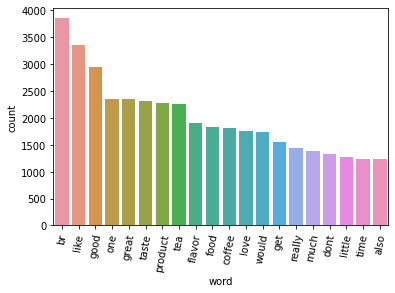

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
sns.barplot(x=most_common_20['word'],y=most_common_20['count'], ax = ax)
ax.tick_params(axis='x',rotation=80)

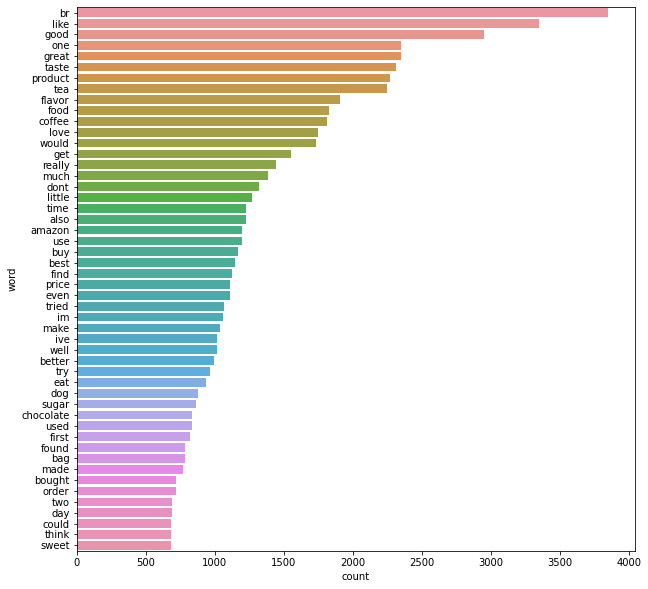

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
sns.barplot(y=most_common_50['word'],x=most_common_50['count'], ax = ax)

In [20]:
text_stop = nltk.Text(all_words_stop)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text_stop)))

In [21]:
common_bigrams_20 = pd.DataFrame(freq_dist_bigrams.most_common(20),columns = ['words','count'])

In [23]:
common_bigrams_20

,words,count
0,"(green, tea)",221
1,"(highly, recommend)",214
2,"(grocery, store)",199
3,"(taste, like)",169
4,"(dog, food)",167
5,"(peanut, butter)",164
6,"(much, better)",159
7,"(ive, tried)",150
8,"(gluten, free)",150
9,"(br, br)",142


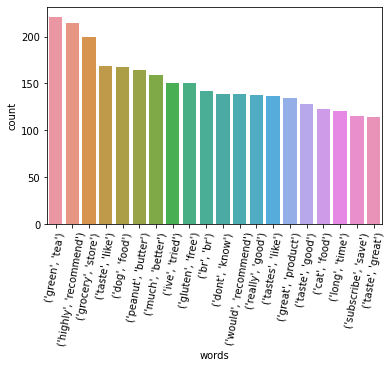

In [24]:
fig = plt.figure()
ax = fig.add_subplot()
sns.barplot(x=common_bigrams_20['words'],y=common_bigrams_20['count'], ax = ax)
ax.tick_params(axis='x',rotation=80)

In [27]:
unique = set(all_words_stop)
unique_series = pd.Series(list(unique))

unique_series

0        soupmake
1        applemon
2         rhyming
3          clover
4        catagory
           ...   
24067        caps
24068        bday
24069        city
24070     perform
24071      nonoil
Length: 24072, dtype: object

In [35]:
palabras_10 = [word for word in all_words_stop if len(word)>10]
freq_dist_10 = nltk.FreqDist(palabras_10)

In [36]:
freq_dist_10_7 = [(key, freq_dist_10[key]) for key in freq_dist_10 if freq_dist_10[key] >= 7 ]

In [41]:
len(freq_dist_10_7)

188

In [30]:
larger_than_10 = unique_series.str.len() > 10
is_frequent = unique_series.apply(lambda x: freq_dist[x] > 7)
unique_series[larger_than_10 & is_frequent]

21         tablespoons
119      unfortunately
414       manufacturer
542        fortunately
717        supplements
             ...      
22753     unbelievable
23038     thanksgiving
23335     marshmallows
23965    international
24025      alternative
Length: 164, dtype: object

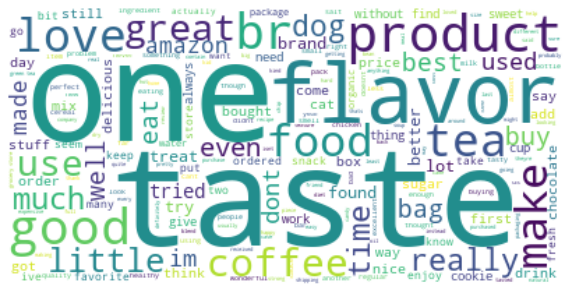

In [34]:
wordcloud = WordCloud(max_font_size=100, background_color='white').generate(' '.join(all_words_stop))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()